# BGGN 212 Co-evolution Project

In [4]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import parser

In [102]:
# rough 

p=np.zeros((2,3,4))  # 3d, rows, columns 
print(p.shape)



(2, 3, 4)


In [5]:
def coEvo_N(N,X1,Y1,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t1):
    
    
    # initialize Numpy array
    data = np.zeros((N,100000,3))
    mutrate1a = np.zeros((N,100000,1))
    mutrate1s = np.zeros((N,100000,1))
    mutrate2a= np.zeros((N,100000,1))
    mutrate2s= np.zeros((N,100000,1))
    eps=10 # increment value
    Stand_data=np.zeros((N,int(T/eps),2))
   
    count=np.ones((N),dtype=int)
    for i in range(N):
#       Assigning to a different variable since this value changes in each iteration i, and if did not do this,
  #     then the first data adding will take place from the previous iteration, which we do not want obvio
        X=X1
        Y=Y1
        t=t1
      
        #add first data
        data[i,0,:]=[t, X, Y]

        # Main loop
        while t < T and ((count[i])<100000):
            if (X <= 0) | (Y<=0):
                break

            rate1 = parser.expr(expr1).compile()
            rate2= parser.expr(expr2).compile()
            rate3 = parser.expr(expr3).compile()
            rate4= parser.expr(expr4).compile()

            u1a =eval(rate1)
            u1s =eval(rate2)
            u2a =eval(rate3)
            u2s =eval(rate4)

    #         u1a =num1-(X*_alpha1)
    #         u1s =num2-(X *_beta1) 
    #         u2a =num1-(Y *_alpha2) 
    #         u2s =num2-(Y *_beta2)

            if u1a <0:
                u1a=0
            if u1s<0:
                u1s=0
            if u2a <0:
                u2a=0
            if u2s<0:
                u2s=0   
           
        
           # saving the mutation rates
            mutrate1a[i,(count[i]-1)]=u1a
            mutrate1s[i,(count[i]-1)]=u1s
            mutrate2a[i,(count[i]-1)]=u2a
            mutrate2s[i,(count[i]-1)]=u2s

            W = u1a + u1s+ u2a+ u2s
            if W == 0: break

            # time point at which evolution happens
            dt = -math.log(random.uniform(0.0, 1.0))/W
            t = t + dt

            # make adjustment of comapring which is small and use in place of u1s
            rand=random.uniform(0.0, 1.0)
            if rand < u1a / W:
                #A1 deleterious mutation in Y
                X = X + 1
                Y = Y - 1
            elif rand < (u1a+u1s) / W:
                #S1 beneficial mutation in Y
                X = X + 1
                Y = Y + 1
            elif rand<(u1a+u1s+u2a)/W:
                #A2 
                X = X - 1
                Y = Y + 1
            else:
                #S2
                X = X + 1
                Y = Y + 1     

            data[i,count[i],:]=[t, X, Y]
            count[i]+=1
            
            #   finding the average across all of the plots 
  # first storing all the values that are less than a part value and greater than another in an a 3d matrix
  # can call it standardization with respect to fixed time intervals 
    
     # this thing is outside the while loop but inside the big for loop
       
        count1=0; # counting for how many values < and >
        count2=0; # storing how many iterations have passed
        count3=0; # storing the value of count1 from the previous iteration
   
        for h in range(0,int(T),eps):
            while((data[i,count1,0] <h+10) and (data[i,count1,0]>=h)):
                  count1+=1
            Stand_data[i,count2,:]=np.nanmean(data[i,count3:count1,:],axis=0)[1:3]  
            count3=count1
            count2+=1
    
                
             



#   now doing the average across the stand data matrix , this thing is outside the for loop
                  
    Avg_data=np.nanmean(Stand_data,axis=0)
    print( Avg_data)
   
    
    # Ploting
    print(data[0,0:count[0],0])
    
    

    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[0,0:count[0],1],data[0,0:count[0],2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[0,0:count[0],0],data[0,0:count[0],1],data[0,0:count[0],0],data[0,0:count[0],2],np.arange(0,int(T),eps),Avg_data[:,0],np.arange(0,int(T),eps),Avg_data[:,1])
    ax[1].legend(figure1, ('Species 1','Species 2','Mean Species 1','Mean Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[0,np.arange(0,(count[0]-1)),0],mutrate1a[0,0:count[0]-1],data[0,np.arange(0,(count[0]-1)),0],mutrate1s[0,0:count[0]-1]) # np.arange is doing time 
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[0,np.arange(0,(count[0]-1)),0],mutrate2a[0,0:count[0]-1],data[0,np.arange(0,(count[0]-1),1),0],mutrate2s[0,0:count[0]-1])
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: Mean of empty slice


[[ 11.25  11.25]
 [ 16.5   16.5 ]
 [ 16.75  16.75]
 [ 19.25  19.25]
 [ 20.75  20.75]
 [ 22.75  22.75]
 [ 24.5   24.5 ]
 [ 25.75  25.75]
 [ 24.5   24.5 ]
 [ 32.    32.  ]
 [ 30.75  30.75]
 [ 32.25  32.25]
 [ 33.75  33.75]
 [ 36.    36.  ]
 [ 40.5   40.5 ]
 [ 40.    40.  ]
 [ 43.25  43.25]
 [ 45.75  45.75]
 [ 48.    48.  ]
 [ 50.5   50.5 ]
 [ 52.    52.  ]
 [ 54.    54.  ]
 [ 55.25  55.25]
 [ 57.25  57.25]
 [ 59.25  59.25]
 [ 62.    62.  ]
 [ 60.    60.  ]
 [ 65.5   65.5 ]
 [ 68.5   68.5 ]
 [ 71.5   71.5 ]
 [ 74.    74.  ]
 [ 76.5   76.5 ]
 [ 79.25  79.25]
 [ 81.25  81.25]
 [ 77.5   77.5 ]
 [ 85.25  85.25]
 [ 93.5   93.5 ]
 [ 89.5   89.5 ]
 [ 91.25  91.25]
 [ 92.75  92.75]
 [ 94.5   94.5 ]
 [ 96.5   96.5 ]
 [ 98.75  98.75]
 [101.   101.  ]
 [103.   103.  ]
 [105.   105.  ]
 [107.5  107.5 ]
 [111.   111.  ]
 [113.75 113.75]
 [117.   117.  ]
 [117.   117.  ]
 [118.   118.  ]
 [120.25 120.25]
 [124.5  124.5 ]
 [123.5  123.5 ]
 [125.5  125.5 ]
 [128.   128.  ]
 [126.   126.  ]
 [135.5  135.5

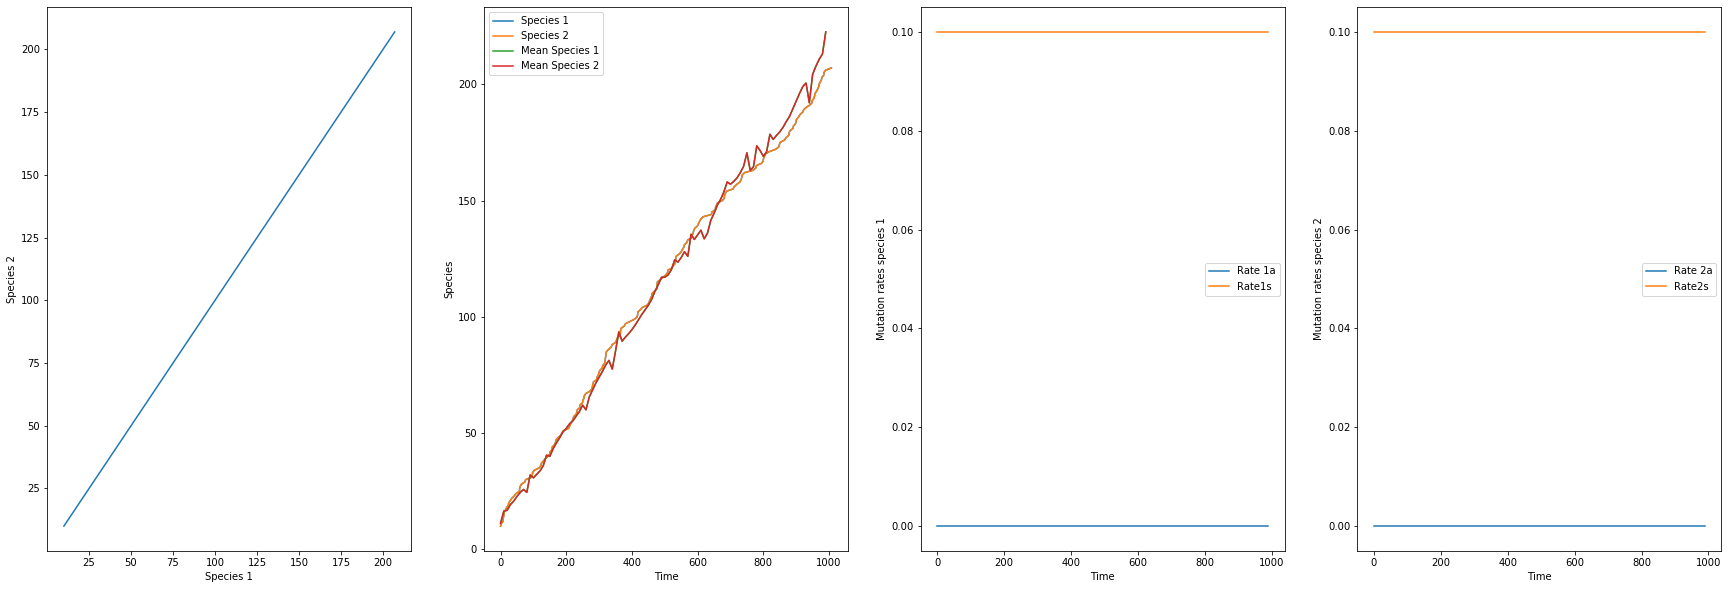

In [121]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1
num1=0  # not needed
num2=0
N=2

coEvo_N(N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

In [6]:
def coEvo(X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((100000,3))
    mutrate1a = np.zeros((100000,1))
    mutrate1s = np.zeros((100000,1))
    mutrate2a= np.zeros((100000,1))
    mutrate2s= np.zeros((100000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<100000):
        if (X <= 0) | (Y<=0):
            break
            
        rate1 = parser.expr(expr1).compile()
        rate2= parser.expr(expr2).compile()
        rate3 = parser.expr(expr3).compile()
        rate4= parser.expr(expr4).compile()
              
        u1a =eval(rate1)
        u1s =eval(rate2)
        u2a =eval(rate3)
        u2s =eval(rate4)
        
#         u1a =num1-(X*_alpha1)
#         u1s =num2-(X *_beta1) 
#         u2a =num1-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0   
        
        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
        if W == 0: break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1     

        data[count1,:]=[t, X, Y]
        count1+=1
             
    # cutting unused 0s    
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
    print(count1)
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;

## I. All u are the same. 
### (1.) No a (antagonistic) mutations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: Mean of empty slice


[[ 10.6         10.6       ]
 [ 13.5         13.5       ]
 [ 16.4         16.4       ]
 [ 18.875       18.875     ]
 [ 20.5         20.5       ]
 [ 23.4         23.4       ]
 [ 25.9         25.9       ]
 [ 28.375       28.375     ]
 [ 30.3         30.3       ]
 [ 32.66666667  32.66666667]
 [ 34.5         34.5       ]
 [ 36.8         36.8       ]
 [ 39.          39.        ]
 [ 41.2         41.2       ]
 [ 46.5         46.5       ]
 [ 45.875       45.875     ]
 [ 39.5         39.5       ]
 [ 47.1         47.1       ]
 [ 49.          49.        ]
 [ 51.3         51.3       ]
 [ 53.9         53.9       ]
 [ 55.375       55.375     ]
 [ 58.375       58.375     ]
 [ 60.8         60.8       ]
 [ 60.375       60.375     ]
 [ 63.1         63.1       ]
 [ 65.5         65.5       ]
 [ 65.25        65.25      ]
 [ 67.9         67.9       ]
 [ 71.25        71.25      ]
 [ 71.5         71.5       ]
 [ 74.          74.        ]
 [ 76.5         76.5       ]
 [ 77.375       77.375     ]
 [ 80.4       

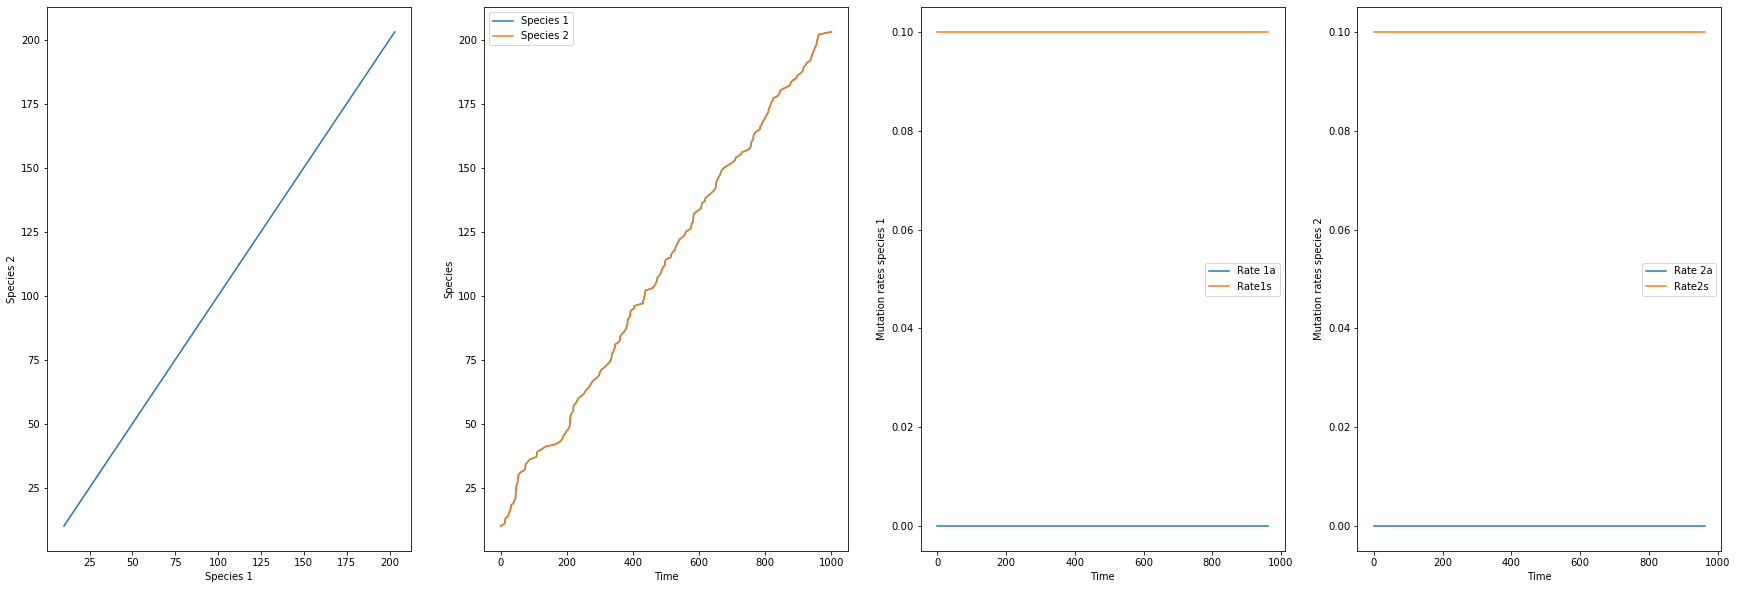

In [110]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1
num1=0  # not needed
num2=0
N=5

coEvo_N(N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

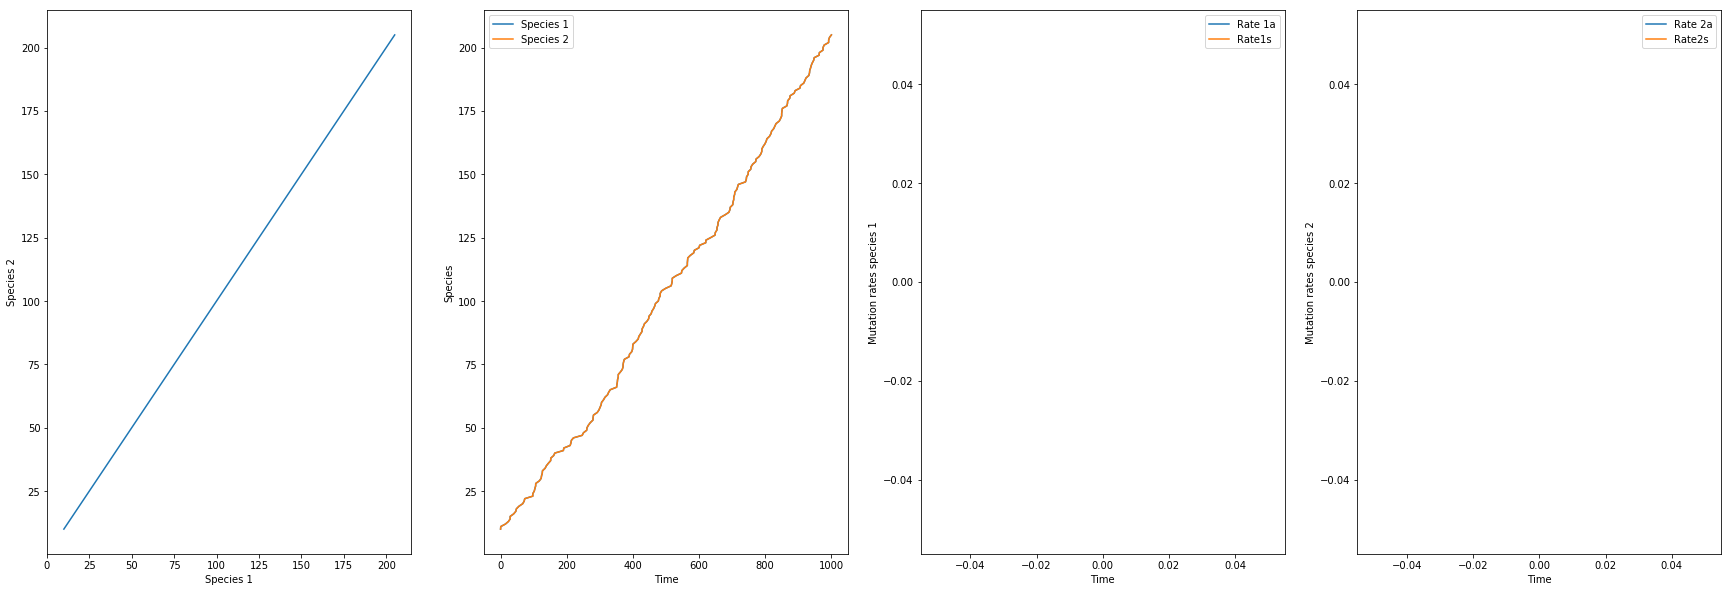

In [111]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (2.) No s(synergistic) mutations

/Users/iriswangziyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: Mean of empty slice


[[ 9.94538095 10.05461905]
 [ 9.90405947 10.09594053]
 [ 9.85528361 10.14471639]
 [ 9.83910492 10.16089508]
 [ 9.72260405 10.27739595]
 [ 9.68397457 10.31602543]
 [ 9.74703059 10.25296941]
 [ 9.7449124  10.2550876 ]
 [ 9.73193911 10.26806089]
 [ 9.77394649 10.22605351]
 [ 9.80365961 10.19634039]
 [ 9.79568067 10.20431933]
 [ 9.78566144 10.21433856]
 [ 9.71716792 10.28283208]
 [ 9.81190058 10.18809942]
 [ 9.86389712 10.13610288]
 [ 9.89774191 10.10225809]
 [ 9.99708333 10.00291667]
 [ 9.9080727  10.0919273 ]
 [ 9.6049905  10.3950095 ]
 [ 9.72496662 10.27503338]
 [ 9.65086883 10.34913117]
 [ 9.6155249  10.3844751 ]
 [ 9.68690282 10.31309718]
 [ 9.77094431 10.22905569]
 [ 9.83304079 10.16695921]
 [ 9.95099552 10.04900448]
 [ 9.81203823 10.18796177]
 [10.0639668   9.9360332 ]
 [10.00883912  9.99116088]
 [ 9.9620229  10.0379771 ]
 [ 9.89896121 10.10103879]
 [ 9.89087141 10.10912859]
 [ 9.90013661 10.09986339]
 [ 9.81054637 10.18945363]
 [10.22937906  9.77062094]
 [10.39417507  9.60582493]
 

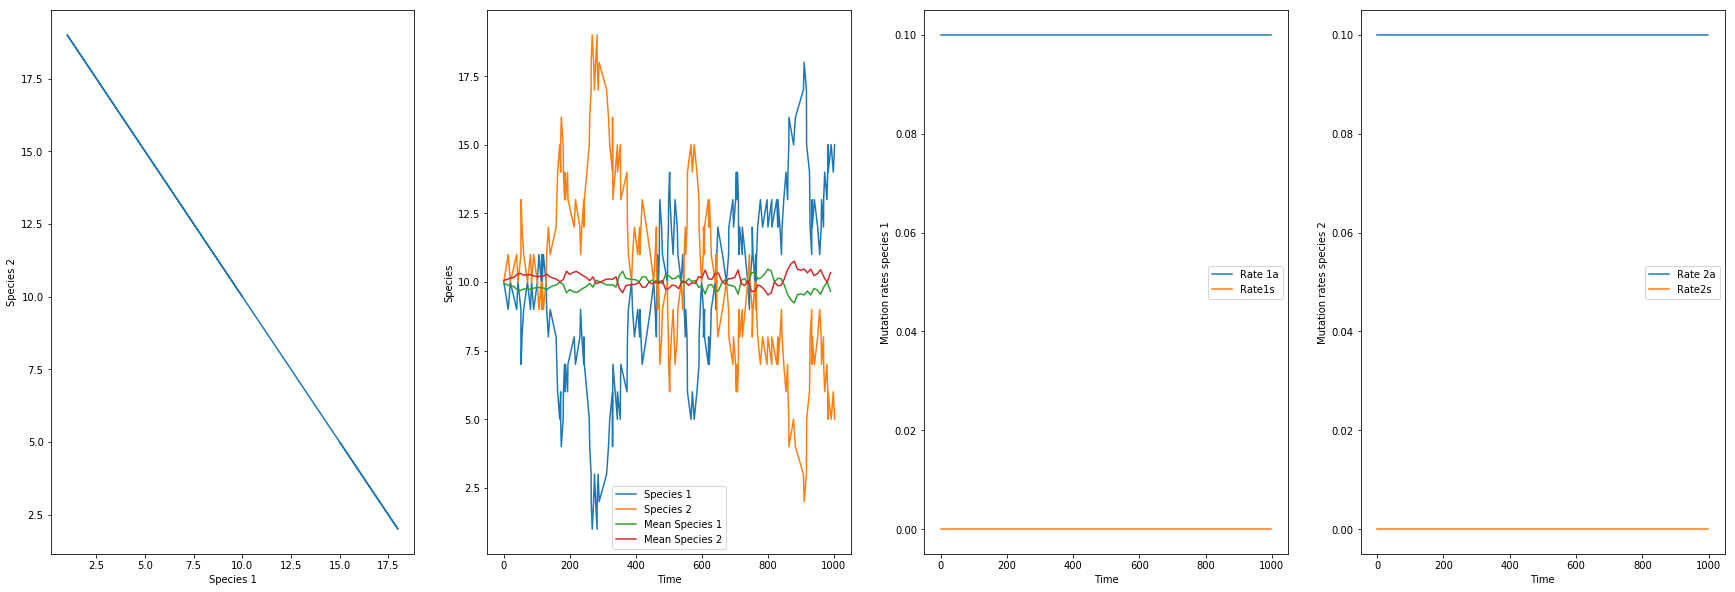

In [10]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0
num1=0
num2=0

N=1000
coEvo_N(N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

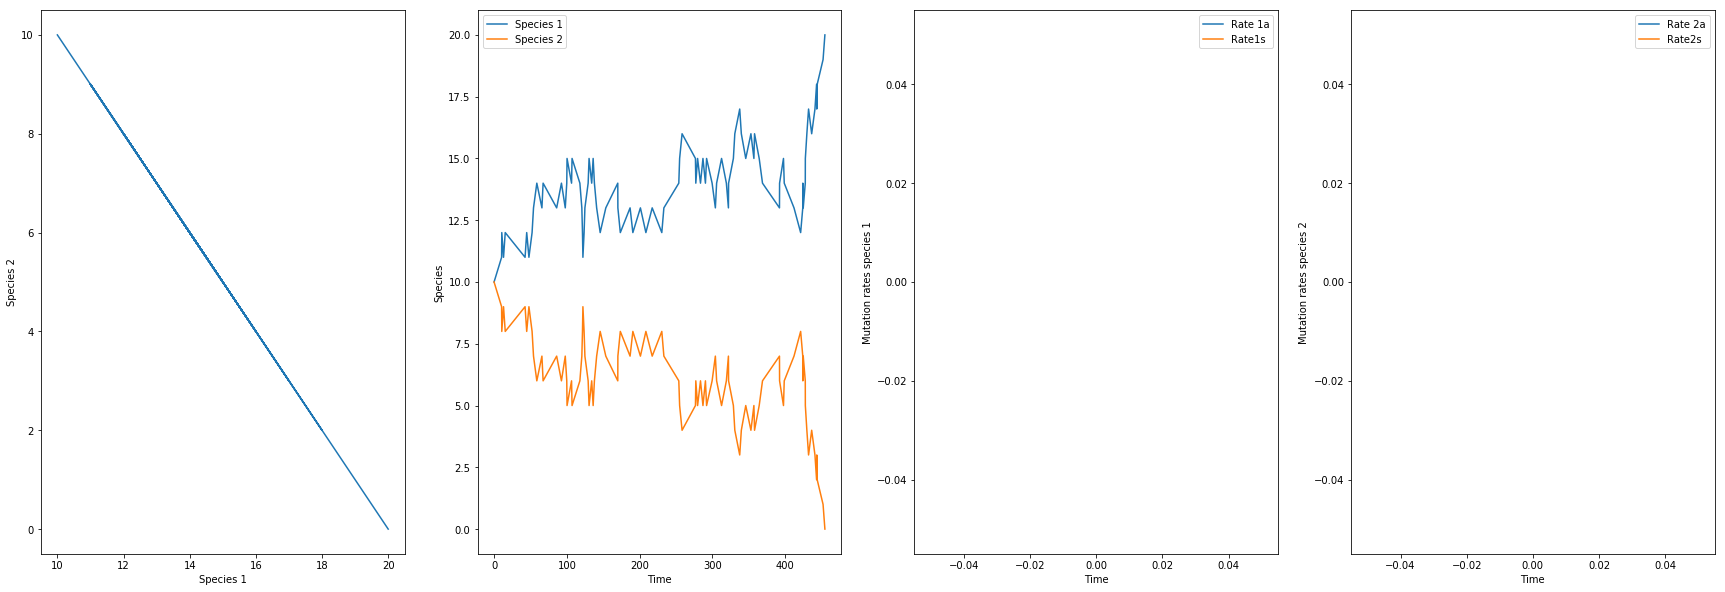

In [113]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (3.) 50% - 50% a and s.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: Mean of empty slice


[[ 11.0058737   10.98423421]
 [ 13.21345226  13.22653653]
 [ 15.18078695  15.18775317]
 [ 17.19361875  17.22609805]
 [ 19.23315925  19.23609619]
 [ 21.26067696  21.25358928]
 [ 23.20901407  23.22382543]
 [ 25.28913479  25.30046493]
 [ 27.38928048  27.30574619]
 [ 29.42971933  29.32866344]
 [ 31.46130999  31.35704973]
 [ 33.57426933  33.34911558]
 [ 35.52365209  35.30682851]
 [ 37.50497602  37.2771954 ]
 [ 39.55986794  39.33149766]
 [ 41.57044764  41.39121011]
 [ 43.51942698  43.42628241]
 [ 45.5927316   45.46614664]
 [ 47.58991277  47.3629131 ]
 [ 49.61436377  49.46067767]
 [ 51.59531511  51.42486079]
 [ 53.55231305  53.45233341]
 [ 55.61466941  55.47280082]
 [ 57.62209209  57.46604771]
 [ 59.67879803  59.57913337]
 [ 61.58475226  61.70302561]
 [ 63.59757509  63.72465241]
 [ 65.6438771   65.58337422]
 [ 67.65686735  67.57376971]
 [ 69.7617652   69.47085261]
 [ 71.81978684  71.49221953]
 [ 73.62480824  73.56650376]
 [ 75.71091871  75.3216231 ]
 [ 77.7029955   77.41954477]
 [ 79.82626336

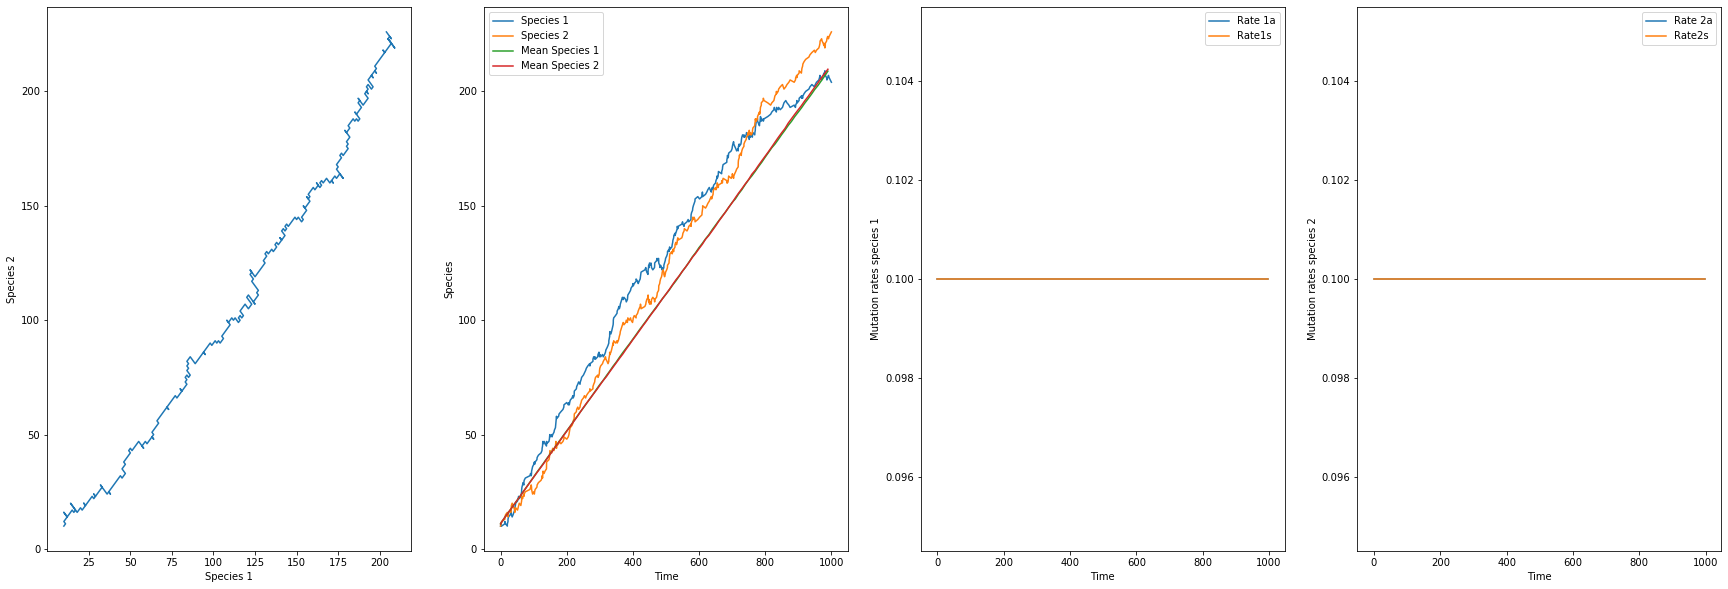

In [127]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1
N=1000

coEvo_N(N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

In [162]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

0.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
1

IndexError: index 1 is out of bounds for axis 0 with size 1

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

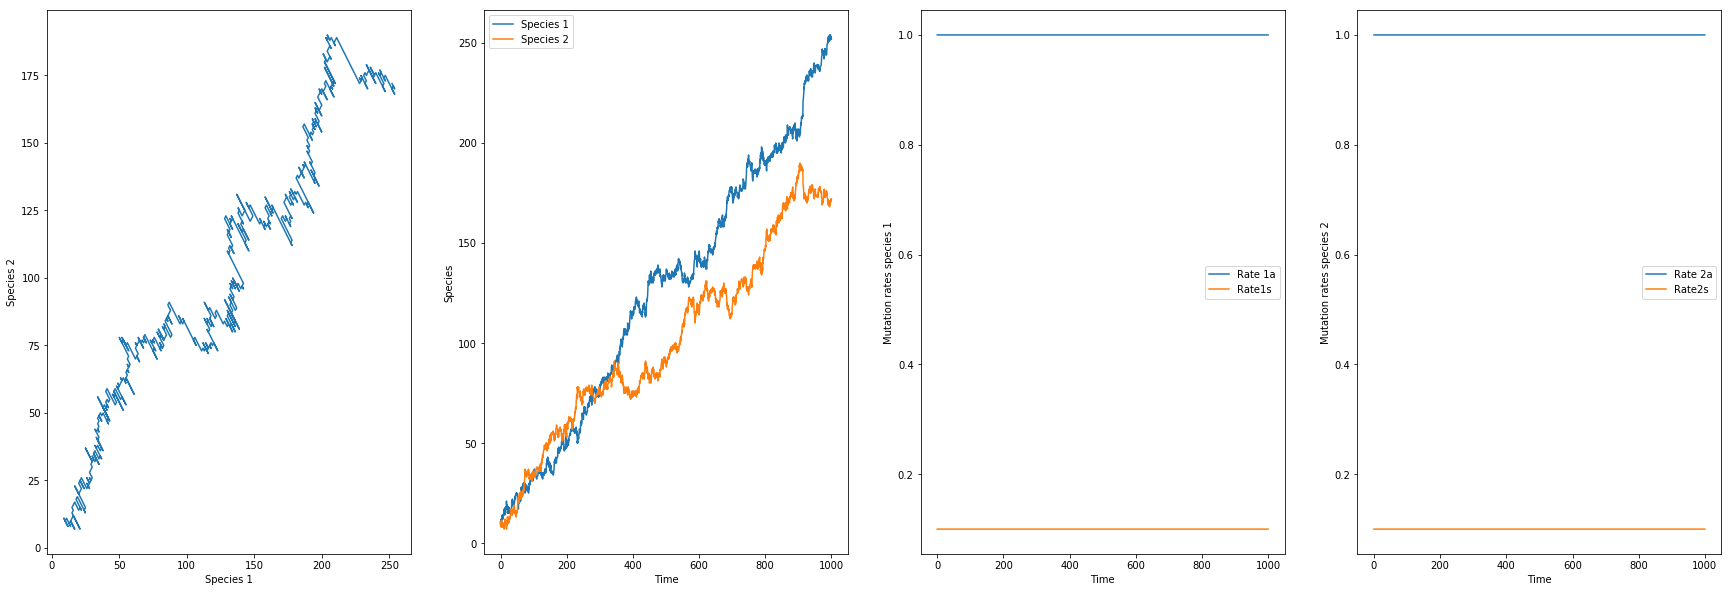

In [6]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1
u1s=0.1
u2a=1
u2s=0.1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

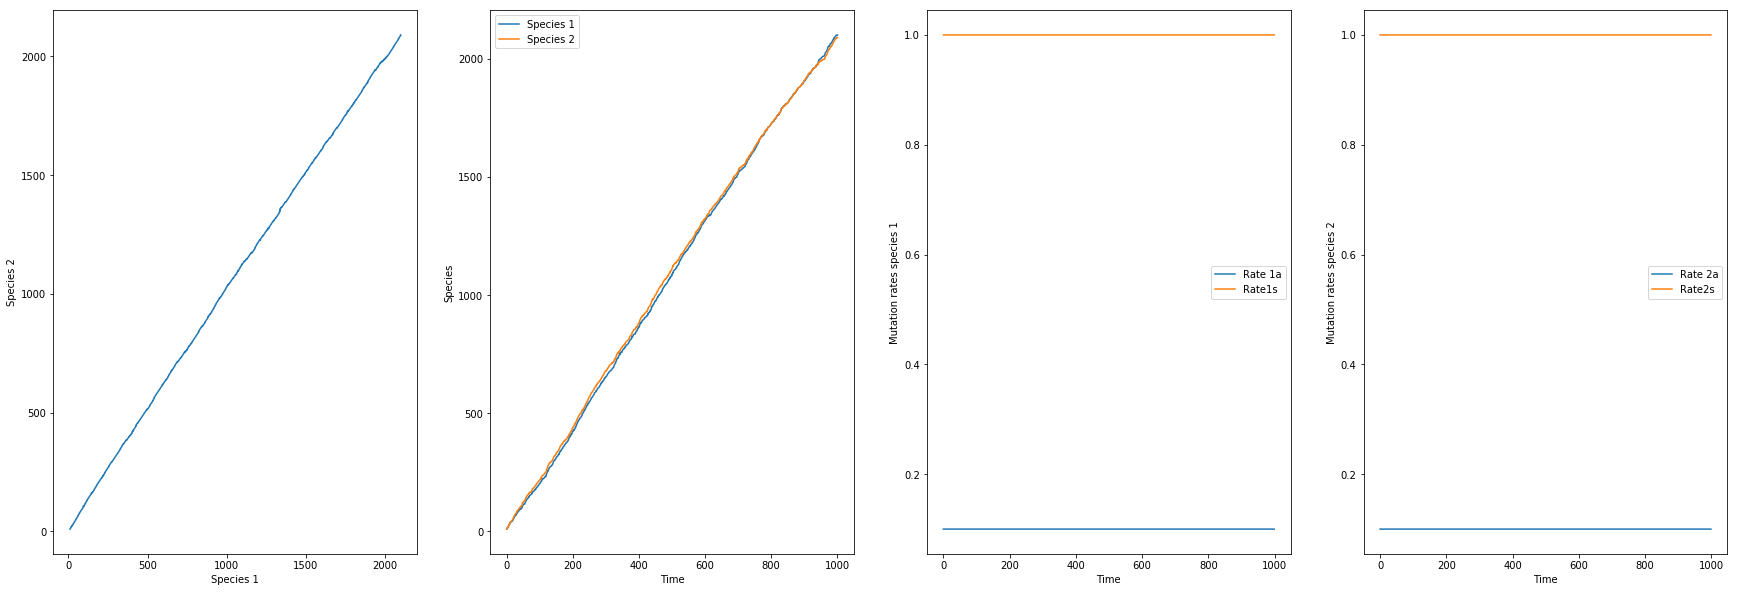

In [7]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=1
u2a=0.1
u2s=1

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## III. Species are symmetric. And rates depend on fitness. Keep slopes the same

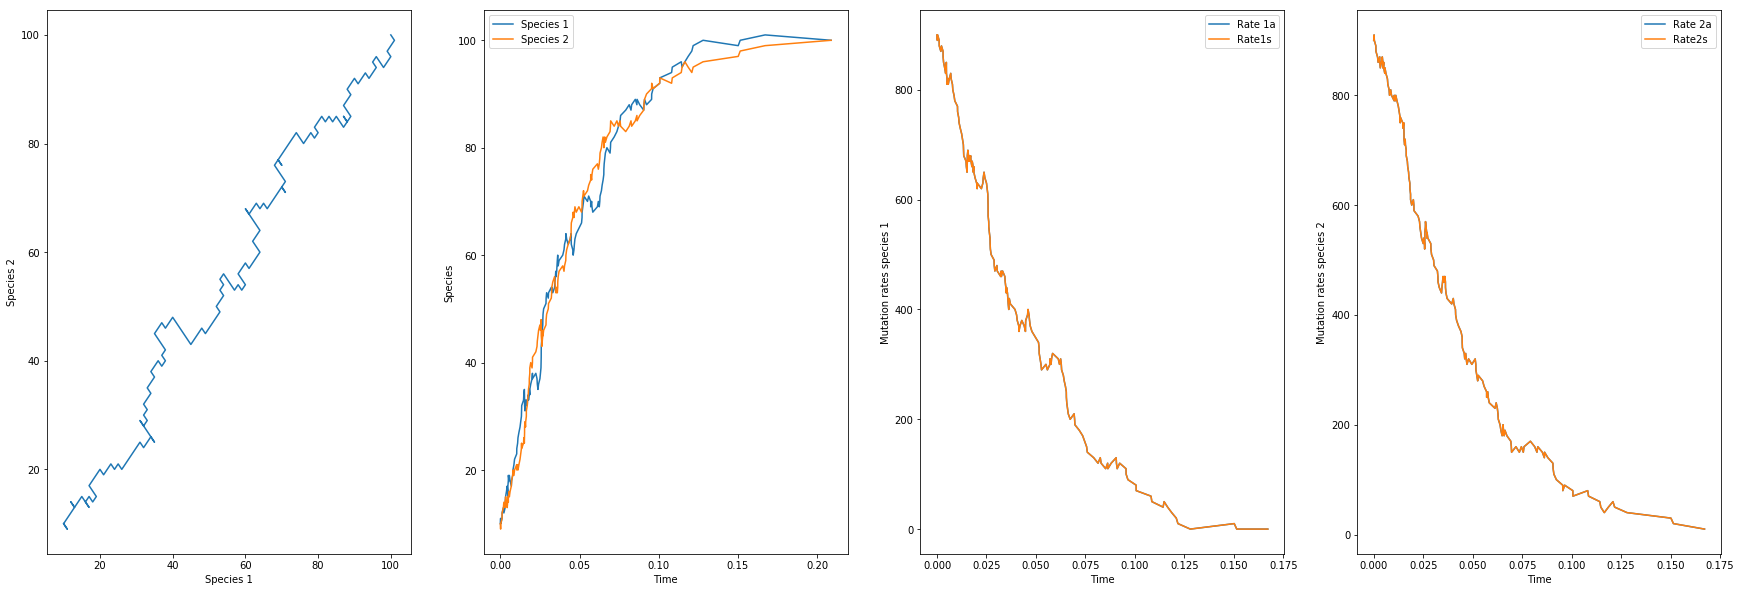

In [8]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 10
_beta1 = 10
_alpha2 = 10
_beta2 = 10

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## IV. Species are symmetric. Mutation rates are different between a and s.
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

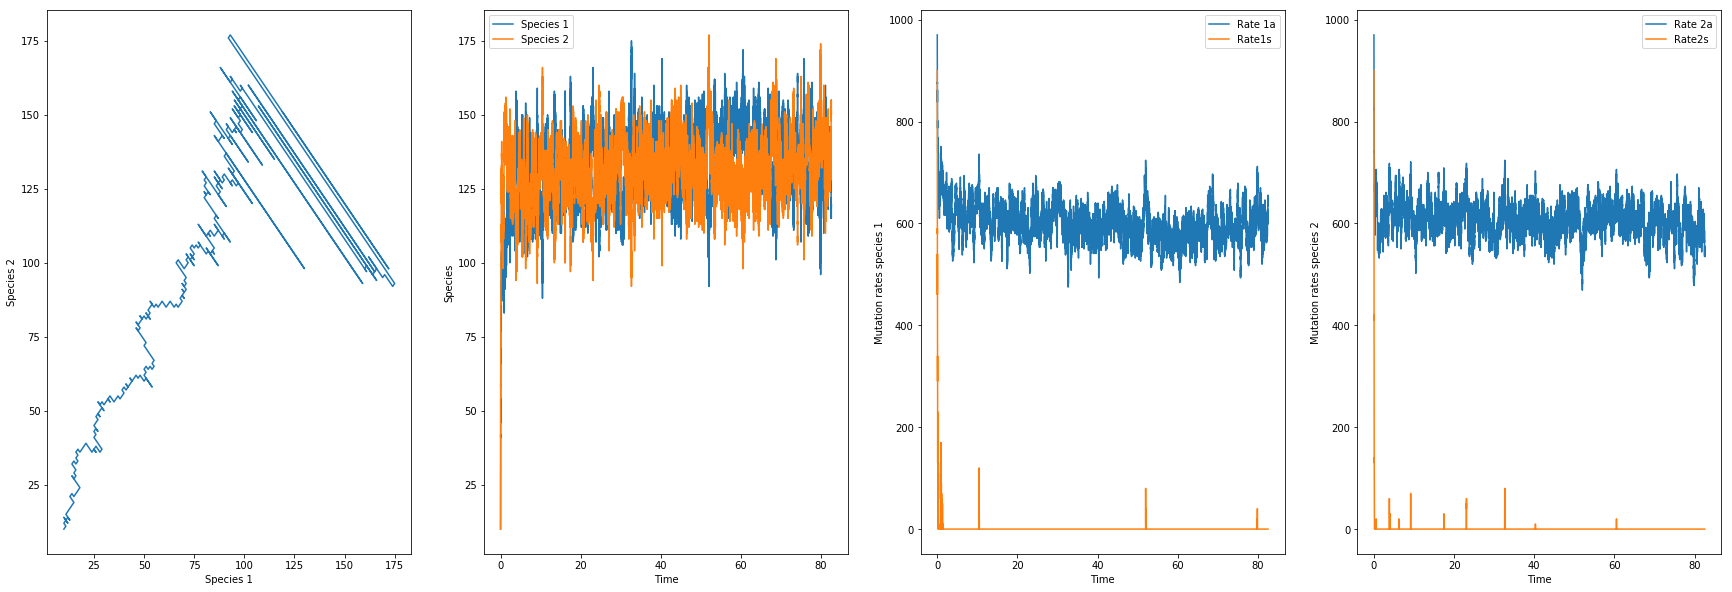

In [9]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 3#antagonistic 1 thereofore slow decrease with respect to X
_beta1 = 10 #synergistic
_alpha2 = 3
_beta2 = 10

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *3)
#         u1s =num1-(X *10) 
#         u2a =num2-(Y *3) 
#         u2s =num2-(Y *10)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

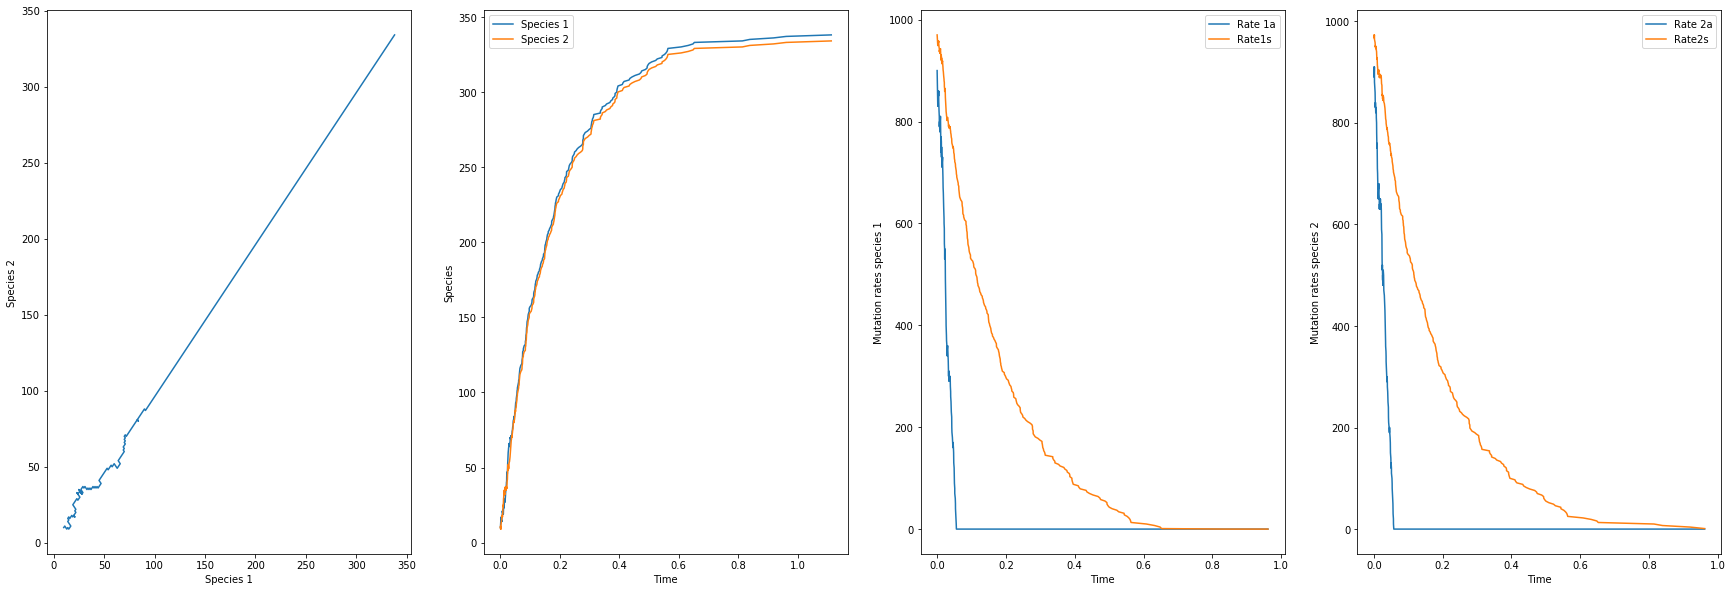

In [10]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 10
_beta1 = 3
_alpha2 = 10
_beta2 = 3

num1=1000
num2=1000

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

### Case 3: Slopes depend on fitness such that they are dependent on time such that there is an interesection between these 2

#### Synergistic more later on

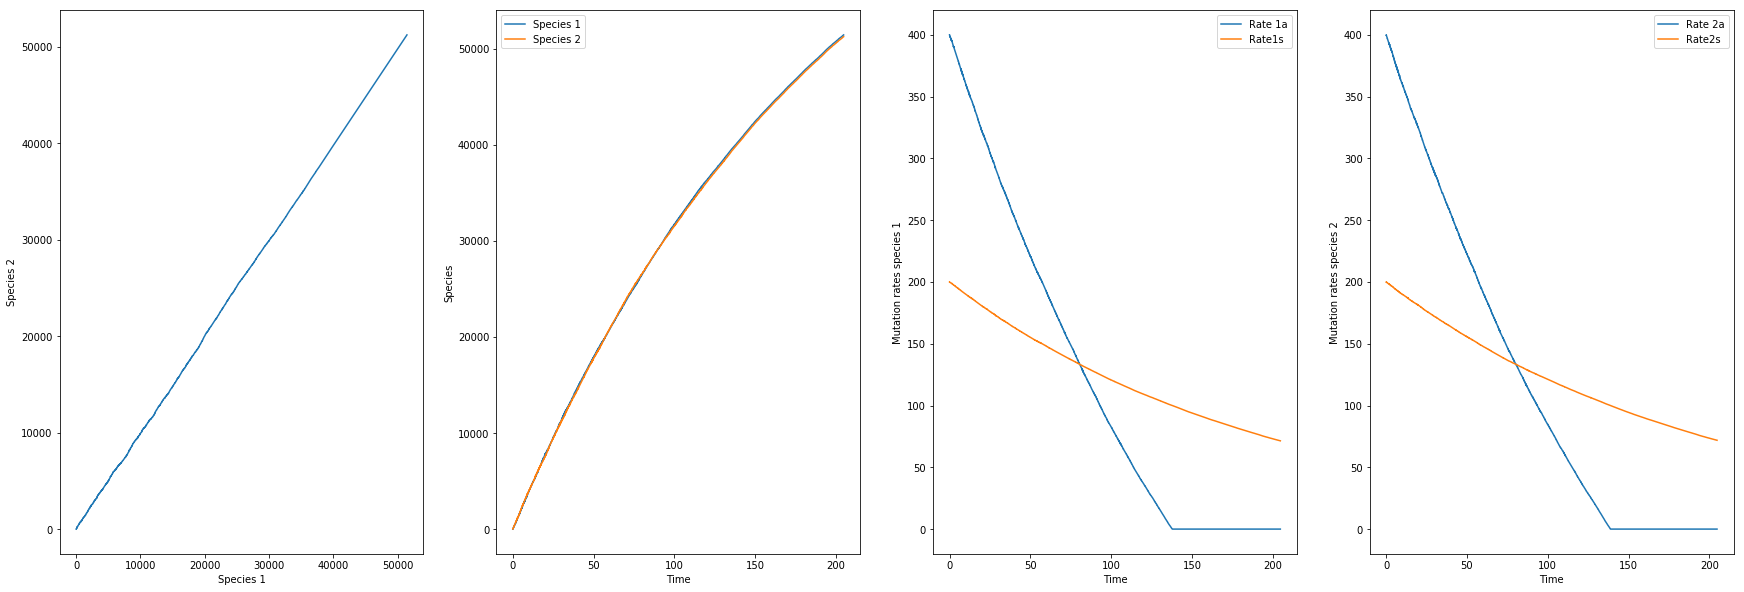

In [11]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.01
_beta1=0.0025
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#### Antagonist more


100000


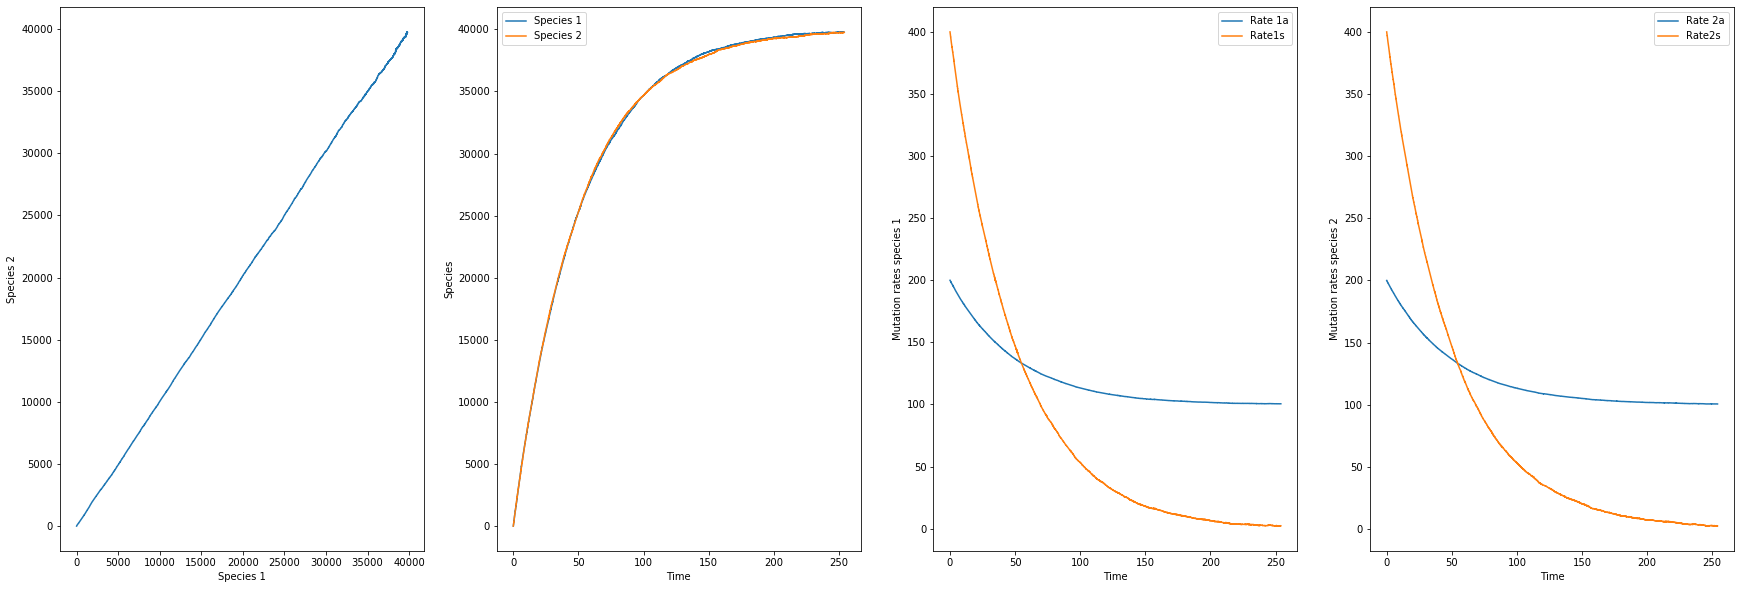

In [129]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0025
_beta1=0.01
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

## V. Species are different.
### Case 1.I: All u are the same. this does not exist


### Case 2.I: No a (antagonistic) mutations for one and no synergistic mutation for other

In [13]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.1
# u2s=0
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 3.I: No a (antagonistic) mutations for one and 50 50 synergistic antagonist mutation for other

In [14]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.1
# u2s=0.1
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

In [15]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.02
# u2s=0.08


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

In [16]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0
# u1s=0.1
# u2a=0.02
# u2s=0.08

# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,antagonist rate more later on

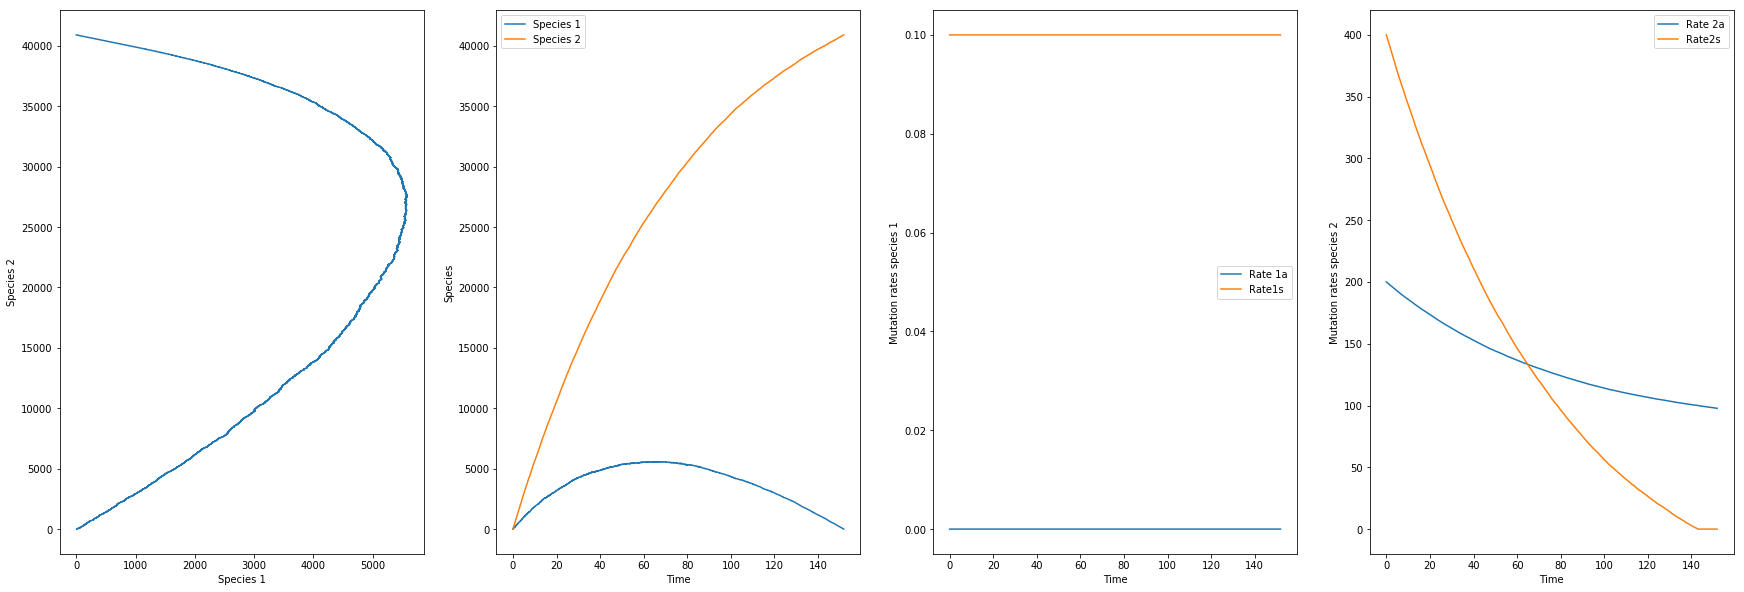

In [17]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,synergistic more later on

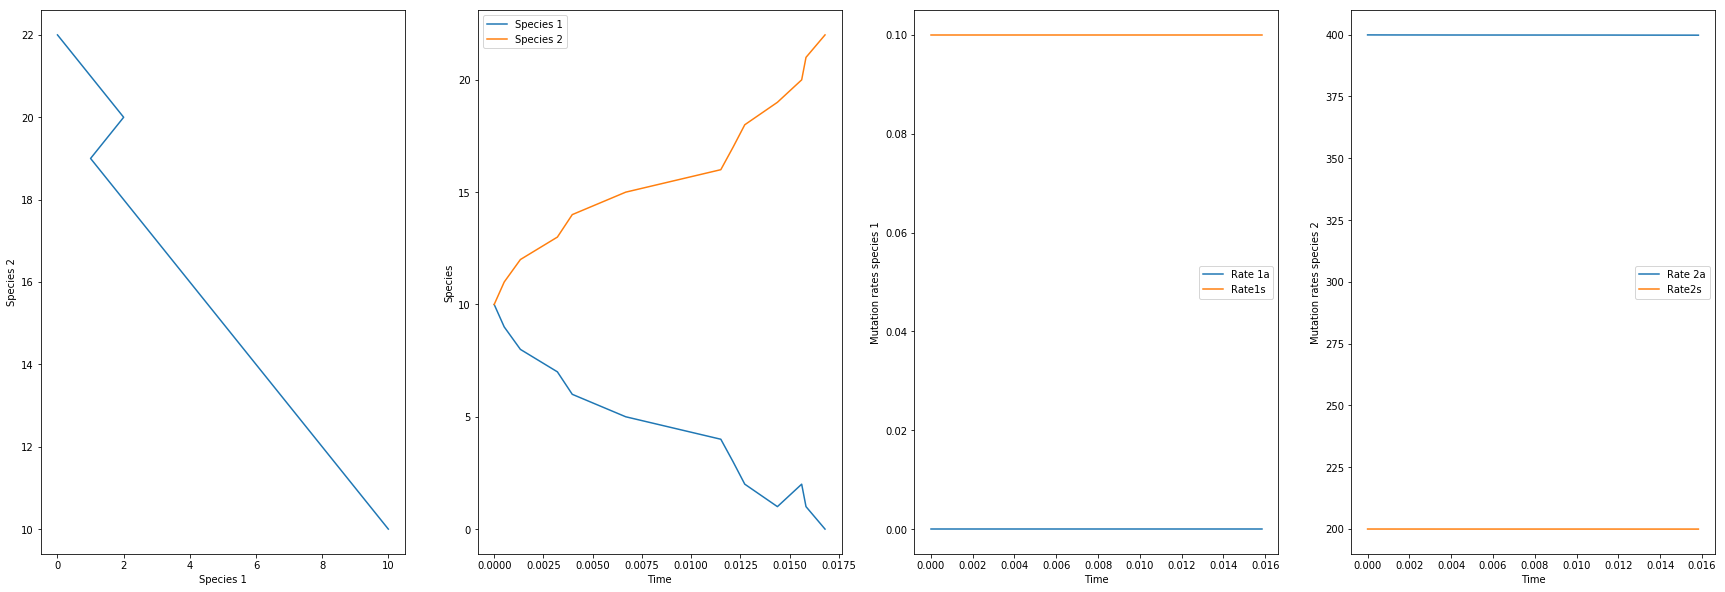

In [18]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and 50 percent antagonist and synergistic for other 

In [19]:
# # Input parameters ####################
# # int; total population
# X = 10
# Y = 10
# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# u1a=0.1
# u1s=0
# u2a=0.1
# u2s=0.1
# num1=0
# num2=0


# coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and antagonist more later on

In [20]:
# # Input parameters #################### Antagonist more
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# _alpha1=0.1
# _beta1=0.0
# _alpha2=0.0025
# _beta2=0.01
# num2=400
# num1=200

# coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and synergistic more later on for other

In [21]:
# # Input parameters #################### Antagonist more
# # int; total population
# X = 10
# Y = 10

# # float; maximum elapsed time
# T = 1000.0 
# # float; start time
# t = 0.0

# _alpha1=0.1
# _beta1=0.0
# _alpha2=0.01
# _beta2=0.0025
# num1=400
# num2=200

# coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)